<a href="https://colab.research.google.com/github/MohamedDonia/Mask_detection/blob/master/Face_Mask_Detection_Training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download The Data From Kaggle

In [ ]:
import os 
os.environ['KAGGLE_USERNAME'] = 'mohameddonia2222'    # user name from json file 
os.environ['KAGGLE_KEY'] = '82f70817ff94720aba9d9ab26ed33963'  # key from json file
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset  # api copied from kagle data set

 94% 312M/330M [00:03<00:00, 96.4MB/s]
100% 330M/330M [00:03<00:00, 103MB/s] 


# Files Unzipping and loading

## File unzipping 

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/face-mask-12k-images-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Ploting some figures 

# Data Preprocessing 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct train data generator for data augmentation 
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15, 
    zoom_range = 0.15,
    fill_mode = 'nearest',
    horizontal_flip = True
)
train_generator = train_datagen.flow_from_directory(
    '/content/Face Mask Dataset/Train', # path that contain training data set 
    target_size = (256, 256),
    class_mode = 'categorical',
    batch_size = 32
)

# construct validatiob data generator for data augmentation 
validation_datagen = ImageDataGenerator(
    rescale = 1/255.0,
)
validation_generator = validation_datagen.flow_from_directory(
    '/content/Face Mask Dataset/Validation', # path that contain validation data set 
    target_size = (256, 256),
    class_mode = 'categorical',
    batch_size = 32
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# Model Definition 

In [ ]:
 from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
 from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout
 from tensorflow.keras import Model
 from tensorflow.keras.optimizers import Adam


# load The MobileNet V2
Pre_trained_model = MobileNetV2(
    input_shape = (224, 224, 3),
    weights = 'imagenet',
    include_top = False
)
# loop over the pre trained model and freeze this layers
for layer in Pre_trained_model.layers:
  layer.trainable = False

# Pre_trained_model.summary()
last_layer_output = Pre_trained_model.output
X = AveragePooling2D(7,7)(last_layer_output)
X = Flatten()(X)
X = Dense(128, activation = 'relu')(X)
X = Dropout(0.5)(X)
X = Dense(2, activation = 'softmax')(X)

model = Model(inputs = Pre_trained_model.input, outputs = X)
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________

# Model Training 

In [ ]:
# compile out model :
EPOCHS = 10
LR = 0.0001
print('[INFO] compiling model ... ')
model.compile(
    optimizer = Adam(learning_rate = LR, decay = LR / EPOCHS),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )

# Train the model :
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = EPOCHS,
    steps_per_epoch = 10000 // 32,
    validation_steps = 800 // 32
)

[INFO] compiling model ... 
Epoch 1/10
312/312 [==============================] - 169s 438ms/step - loss: 0.2850 - accuracy: 0.8943 - val_loss: 0.0975 - val_accuracy: 0.9688
Epoch 2/10
312/312 [==============================] - 133s 426ms/step - loss: 0.1306 - accuracy: 0.9597 - val_loss: 0.0627 - val_accuracy: 0.9812
Epoch 3/10
312/312 [==============================] - 134s 429ms/step - loss: 0.0958 - accuracy: 0.9696 - val_loss: 0.0468 - val_accuracy: 0.9875
Epoch 4/10
312/312 [==============================] - 132s 423ms/step - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0393 - val_accuracy: 0.9900
Epoch 5/10
312/312 [==============================] - 133s 425ms/step - loss: 0.0740 - accuracy: 0.9745 - val_loss: 0.0366 - val_accuracy: 0.9887
Epoch 6/10
312/312 [==============================] - 132s 422ms/step - loss: 0.0625 - accuracy: 0.9797 - val_loss: 0.0329 - val_accuracy: 0.9912
Epoch 7/10
312/312 [==============================] - 131s 419ms/step - loss: 0.0592 - accuracy:

## Plotting the results

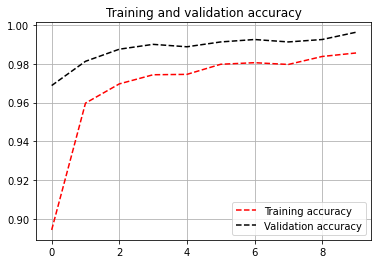

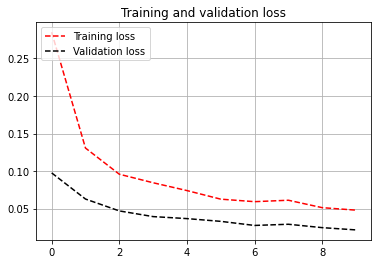

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
# plotting the accuracy :
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'k--', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# plotting the loss
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'k--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Saving the model

In [ ]:
model.save("mask_detector.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Test The results 

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


# True Nositives:
images = []
for img in os.listdir('/content/Face Mask Dataset/Test/WithMask'):
  img_path = os.path.join('/content/Face Mask Dataset/Test/WithMask', img)
  img = load_img(img_path, target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  images.append(img)
images = np.vstack(images)
predictions = model.predict(images)

count = 0
for prediction in predictions:
  if prediction[0] > prediction[1]:
    count += 1
print("With Musk Accuracy ", str(count*100.0 / len(images)))

# True Negatives:
images = []
for img in os.listdir('/content/Face Mask Dataset/Test/WithoutMask'):
  img_path = os.path.join('/content/Face Mask Dataset/Test/WithoutMask', img)
  img = load_img(img_path, target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  images.append(img)
images = np.vstack(images)
predictions = model.predict(images)
#print(predictions)
count = 0
for prediction in predictions:
  if prediction[0] < prediction[1]:
    count += 1
print("Without Musk Accuracy ", str(count*100.0 / len(images)))

With Musk Accuracy  91.7184265010352
Without Musk Accuracy  68.56581532416503
